https://heartbeat.comet.ml/using-machine-learning-for-language-detection-517fa6e68f22

In [215]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder

In [216]:
files ={
    'Spanish' : 'Spanish',
    'English' : 'English',
    #'German1' : 'German',
    'German2' : 'German',
    'French1' : 'French',
    'French2' : 'French'
}

file_directory = os.getcwd()
extractedText_folder = 'ExtractedText/'

df_cv_full = pd.DataFrame()
for file in files:
    df_cv_language = pd.read_csv(file_directory + '/' + extractedText_folder + '/' + file + '.txt', delimiter="qwer", names=["Sentence"], encoding='utf-8', header=None)
    df_cv_language['Class'] = files[file]
    df_cv_full = pd.concat([df_cv_full, df_cv_language.iloc[:5000]], ignore_index=True)
    df_cv_full = df_cv_full.reindex(range(df_cv_full.shape[0]))

x_cv = df_cv_full['Sentence']
y_cv = df_cv_full['Class']

c:\RoboDK\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [217]:
df_cv_full["Class"].value_counts()

Spanish    5000
English    5000
German     5000
French     4490
Name: Class, dtype: int64

In [218]:
le = LabelEncoder()
y_cv = le.fit_transform(y_cv)

In [219]:
text_list = []
for text in x_cv:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        text_list.append(text)

In [220]:
cv = CountVectorizer()
x_cv_n = cv.fit_transform(x_cv).toarray()
x_cv_n.shape

(19490, 45680)

In [221]:
x_cv_train, x_cv_test, y_cv_train, y_cv_test = train_test_split(x_cv_n, y_cv, test_size = 0.20)

In [222]:
modelMNB = MultinomialNB()
modelMNB.fit(x_cv_train, y_cv_train)

MultinomialNB()

In [223]:
y_cv_prediction = modelMNB.predict(x_cv_test)

In [224]:
accuracy_cv = accuracy_score(y_cv_test, y_cv_prediction)
confusion_m_cv = confusion_matrix(y_cv_test, y_cv_prediction)
print("The accuracy is :", accuracy_cv)

The accuracy is : 0.9992303745510518


In [225]:
label_names = ['Spanish','English','German','French']
print(classification_report(y_cv_test, y_cv_prediction, target_names=label_names))

              precision    recall  f1-score   support

     Spanish       1.00      1.00      1.00      1021
     English       1.00      1.00      1.00       889
      German       1.00      1.00      1.00       992
      French       1.00      1.00      1.00       996

    accuracy                           1.00      3898
   macro avg       1.00      1.00      1.00      3898
weighted avg       1.00      1.00      1.00      3898



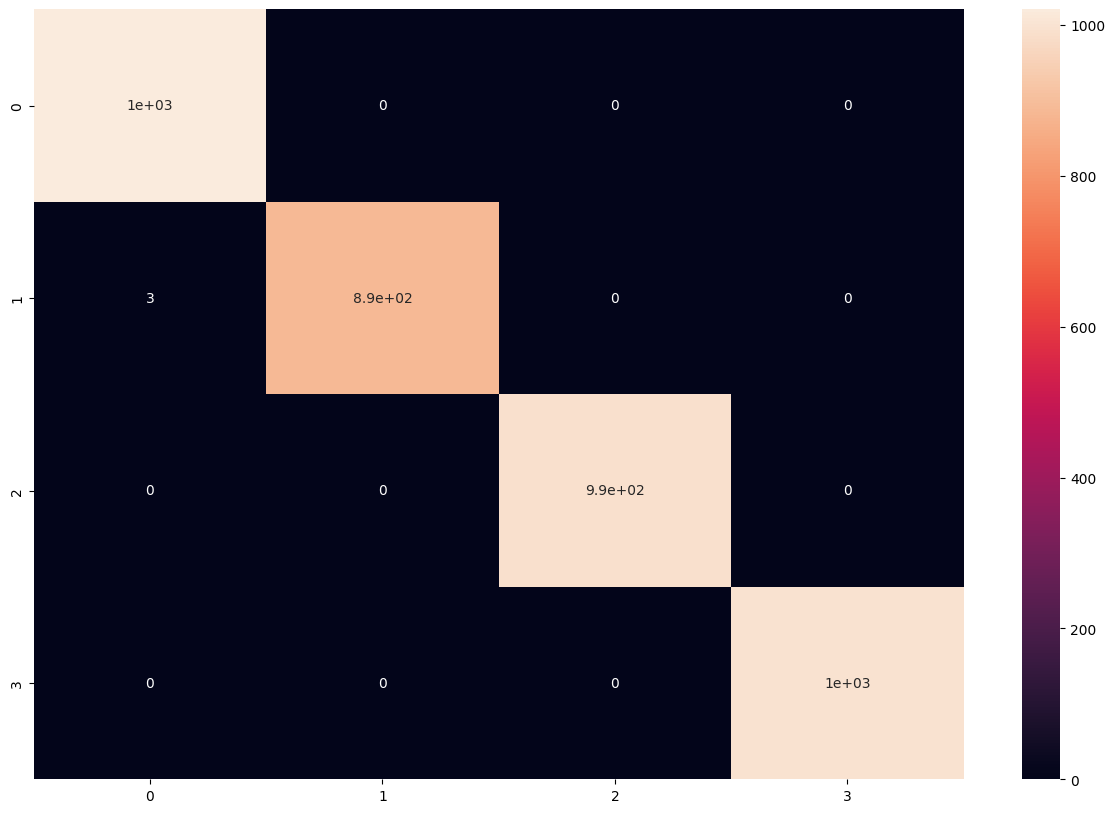

In [226]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_m_cv, annot = True)
plt.show()

In [227]:
def lang_predict(text):
     x = cv.transform([text]).toarray() 
     lang = modelMNB.predict(x)
     lang = le.inverse_transform(lang) 
     print("The language is in",lang[0])

In [228]:
lang_predict("Hola buenos días qué tal estás")

The language is in Spanish


In [229]:
import pickle
import pandas
filename = 'Trained_model.sav'
pickle.dump(modelMNB, open(filename, 'wb'))
filename = 'cv.sav'
pickle.dump(modelMNB, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))


def lang_predict(text):
     x = cv.transform([text]).toarray() 
     lang = loaded_model.predict(x)
     lang = le.inverse_transform(lang)
     print("The language is in",lang[0])


lang_predict('valla la cabaya')

The language is in Spanish


In [231]:
import pickle
import pandas

filename_model = 'Trained_model.sav'
filename_le = 'le.sav'
filename_cv = 'cv.sav'

pickle.dump(modelMNB, open(filename_model, 'wb'))
pickle.dump(cv, open(filename_cv, 'wb'))
pickle.dump(le, open(filename_le, 'wb'))


loaded_model = pickle.load(open(filename_model, 'rb'))
cv_loaded = pickle.load(open(filename_cv, 'rb'))
le_loaded = pickle.load(open(filename_le, 'rb'))

def lang_predict(text):
     x = cv_loaded.transform([text]).toarray() 
     lang = loaded_model.predict(x)
     lang = le_loaded.inverse_transform(lang)
     print("The language is in",lang[0])

lang_predict('valla la cabaya')

The language is in Spanish


In [ ]:
lang_predict('How are you')

The language is in English
